In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import yfinance as yf
import pandas_datareader as web
from tabulate import tabulate

In [38]:
data  = web.DataReader('AXISBANK.NS',data_source = 'yahoo',start = '2000-01-03',end = '2021-04-30')['Adj Close']
s = data[0]





In [39]:
#calculating volatility of dataset
stock_return = (data/data.shift(1)) - 1
volatility = stock_return.std() * np.sqrt(252)





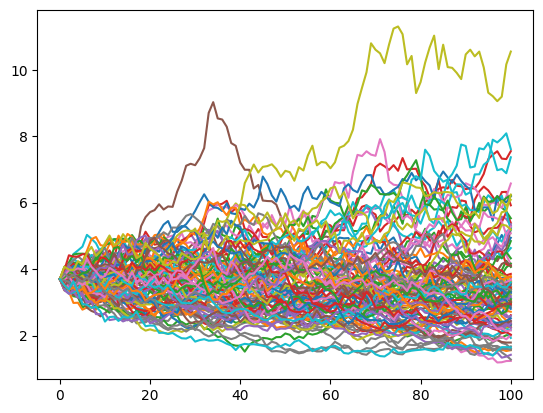

In [40]:
#drift coefficient
mu = 0.08
#number of steps
n = 100
#time in years
t = 1
#number of simulations
m = 1000
#initial stock price
s = data[0]

#calc each time step
dt = t/n
paths = []


#simulating sample path through brownian motion
for i in range(n):
    prices = [s]
    time = 0
    
    while(time+dt<=t):
        prices.append(prices[-1]*np.exp((mu - 0.5*(volatility**2))*dt + volatility*np.random.normal(0, np.sqrt(dt))))
        time+=dt
        
    if((t-time)>0):
        prices.append(prices[-1]*np.exp((mu - 0.5*(volatility**2))*(t-time) + volatility*np.random.normal(0, np.sqrt(t-time))))
    
    paths.append(prices)


    

    
for path in paths:
    plt.plot(path)
    
